<a href="https://colab.research.google.com/github/cyan9212/Machine_Learning_Basics/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(50, 10000)


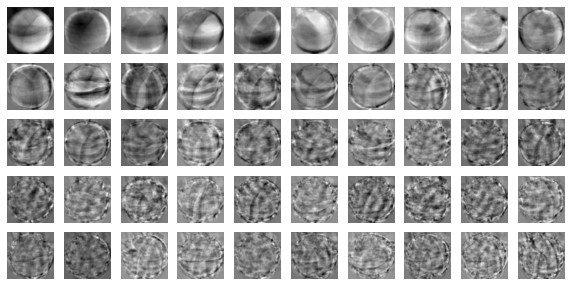

(300, 10000)
(300, 50)
(300, 10000)


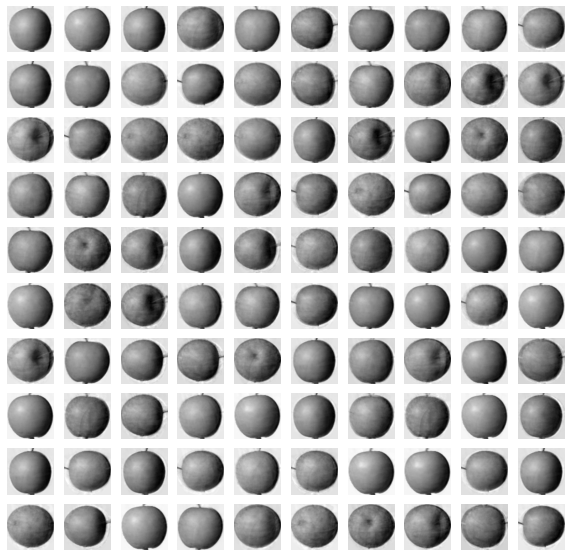

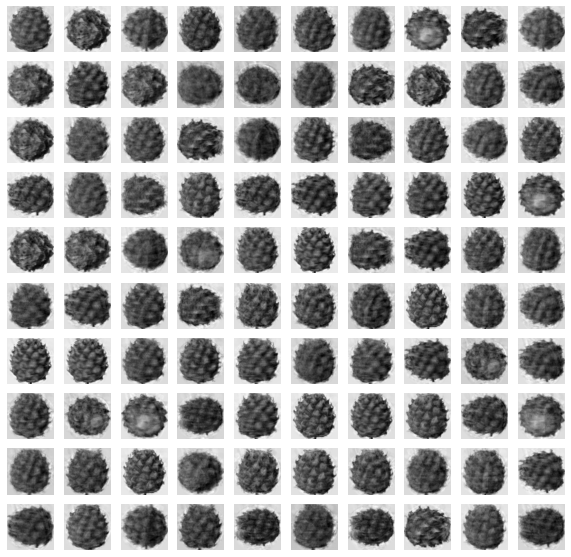

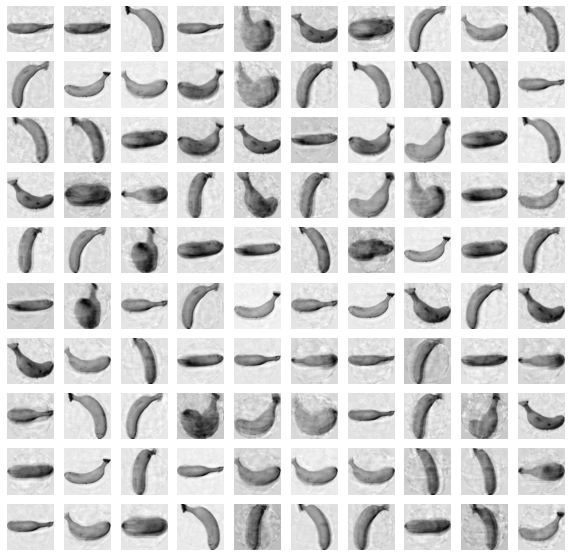



0.921425868118081


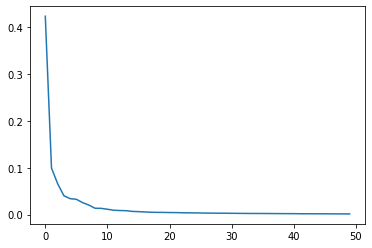

0.9966666666666667
1.4228030681610107
1.0
0.036726522445678714
2
(300, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


1.0
0.036726522445678714
(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


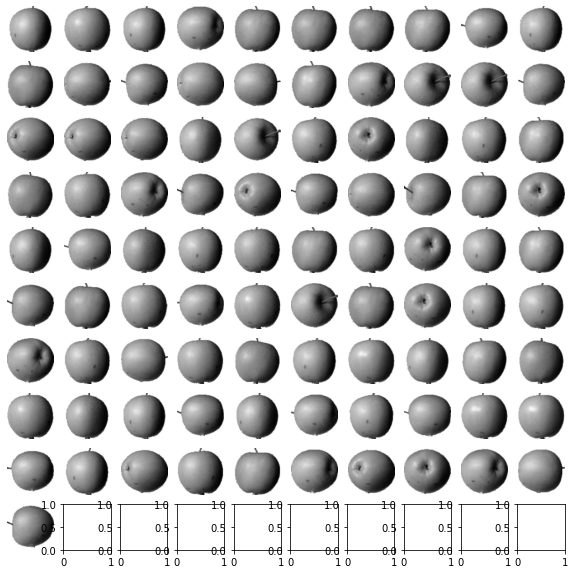

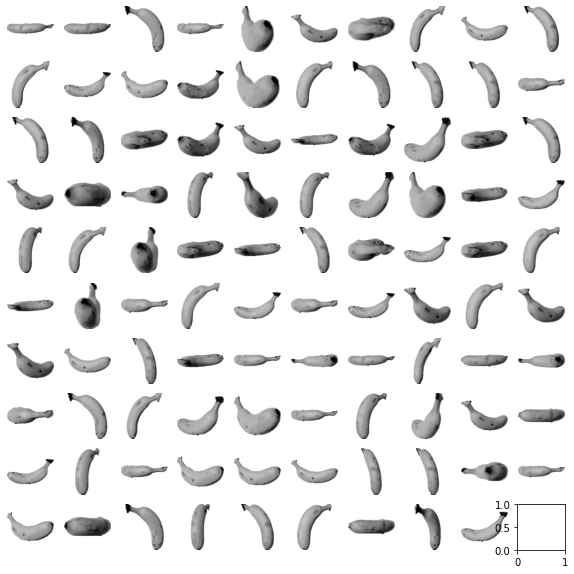

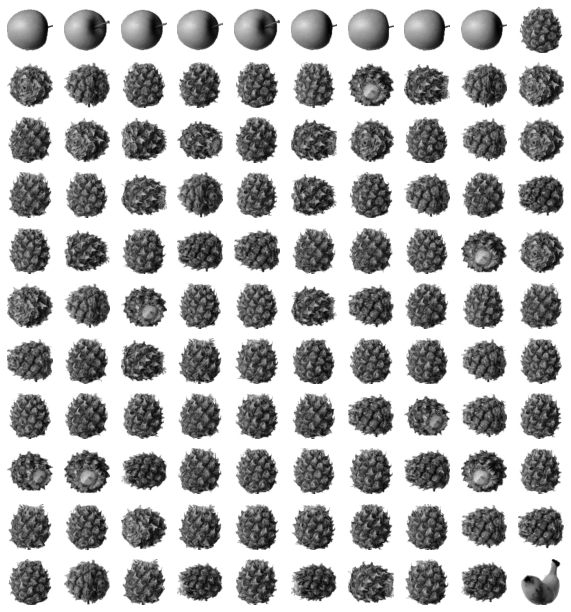

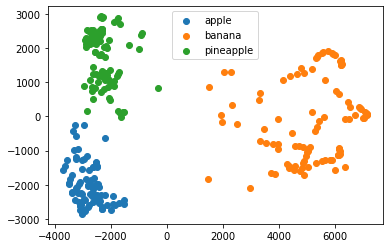

In [ ]:
#!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans


#이미지 출력 함수
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 +j <n:
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
        axs[i,j].axis('off')
  plt.show()

#데이터 불러오기
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

#PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)
print(pca.components_.shape)

draw_fruits(pca.components_.reshape(-1,100,100))
print(fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

fruits_reconstruct = fruits_inverse.reshape(-1,100,100)

for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

print(np.sum(pca.explained_variance_ratio_))

plt.plot(pca.explained_variance_ratio_)
plt.show()

#원본 데이터 로지스틱 회귀
lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

#차원축소된 데이터 로지스틱 회귀
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

score = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

km = KMeans(n_clusters=3,random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

for label in range(3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

for label in range(0,3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()